# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in any data science workflow. It is used to become familiar with the dataset; understanding variable types, distributions, and relationships between features. A thorough analysis at this stage helps guide decision-making for subsequent steps in the project. Moreover, it provides the necessary insights to improve or apply transformations to the data before feeding it into a model.

#### Import necessary libraries and load data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_parquet('../data/processed/df.parquet')
numerical_df = pd.read_parquet('../data/processed/numerical_df.parquet')
categorical_df = pd.read_parquet('../data/processed/categorical_df.parquet')

## Target Class Balance

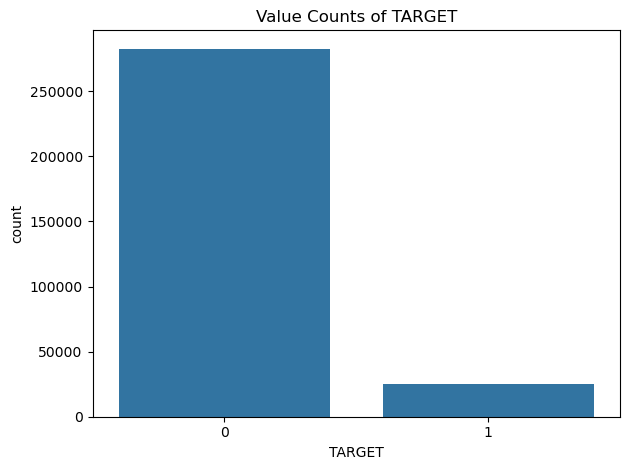

In [10]:
ax = sns.countplot(data= df, x= "TARGET")
plt.title(f'Value Counts of TARGET')
plt.tight_layout()
plt.show()

There is a significant class imbalance in the TARGET variable, as shown in this plot. This issue will be addressed in the following steps, since failing to correct it may lead to problems in our models. Specifically, the models might struggle to correctly classify the minority class (1). To handle this, several techniques can be applied, such as undersampling, oversampling, class weighting, or adjusting the evaluation metrics.

## Feature Distributions

We will look for the distributions of the different numerical features. Numerical features form the backbone of most machine learning models. Understanding their distributions helps us make informed decisions about preprocessing and feature engineering.

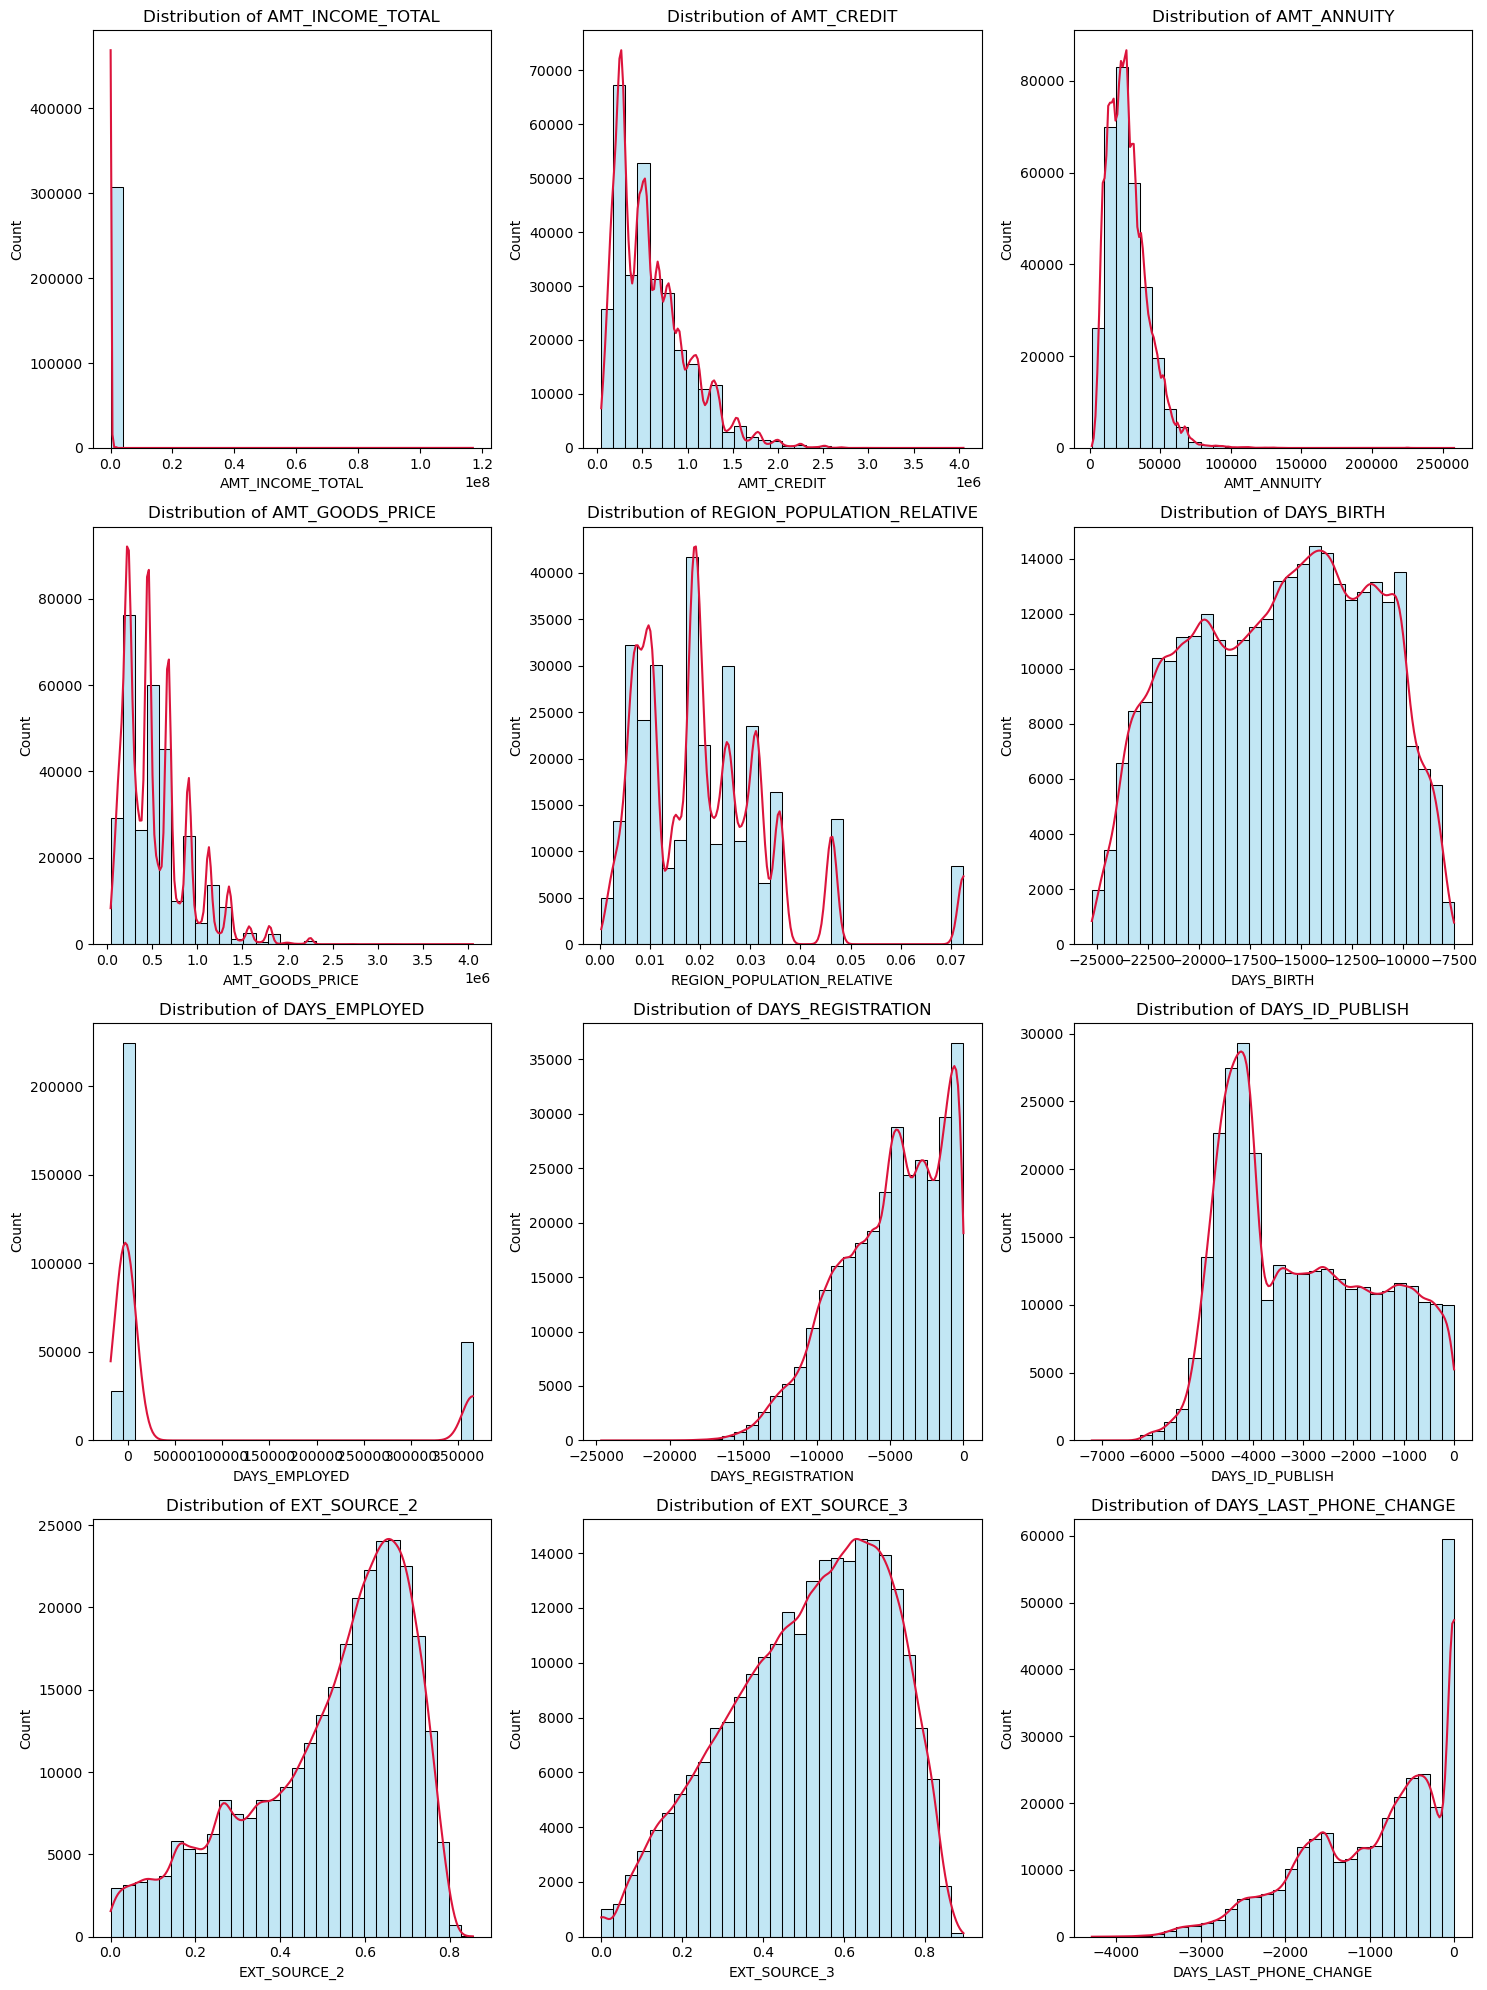

In [7]:
nColumns = numerical_df.columns

#Drop columns with no meaning
nColumns = nColumns.drop(['AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'])


#Visulize distributions of numerical columns in histograms 
cols = 3
rows = int(np.ceil(len(nColumns)/cols))
plt.figure(figsize=(cols*5,rows*5))

for i, col in enumerate(nColumns,1):
    plt.subplot(rows,cols,i)
    ax = sns.histplot(df[col],
                kde=True,
                color= 'skyblue',
                bins= 30)
    ax.lines[0].set_color('crimson')
    plt.title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()

Machine learning models tend to perform better with normally distributed data. Therefore, in the following steps, we should apply transformations to approximate skewed or non-normal distributions to a more normal shape.

After analyzing the distribution of the numerical columns, we get several relevant characteristics of the data, visualize in different graphs for a better interpretation.

There are some columns that have a normal distribution, such as EXT_SOURCE_2 and EXT_SOURCE_3 columns, while others have a left-skewed distribution, such as DAYS_REGISTRATION, and others have a right-skewed distribution as AMT_ANNUITY. As commented, these columns will be transformed on next steps.

We can visualize the distribution taking into account the target variable. This will help us to understand the relationship between the numerical variables and the target variable.

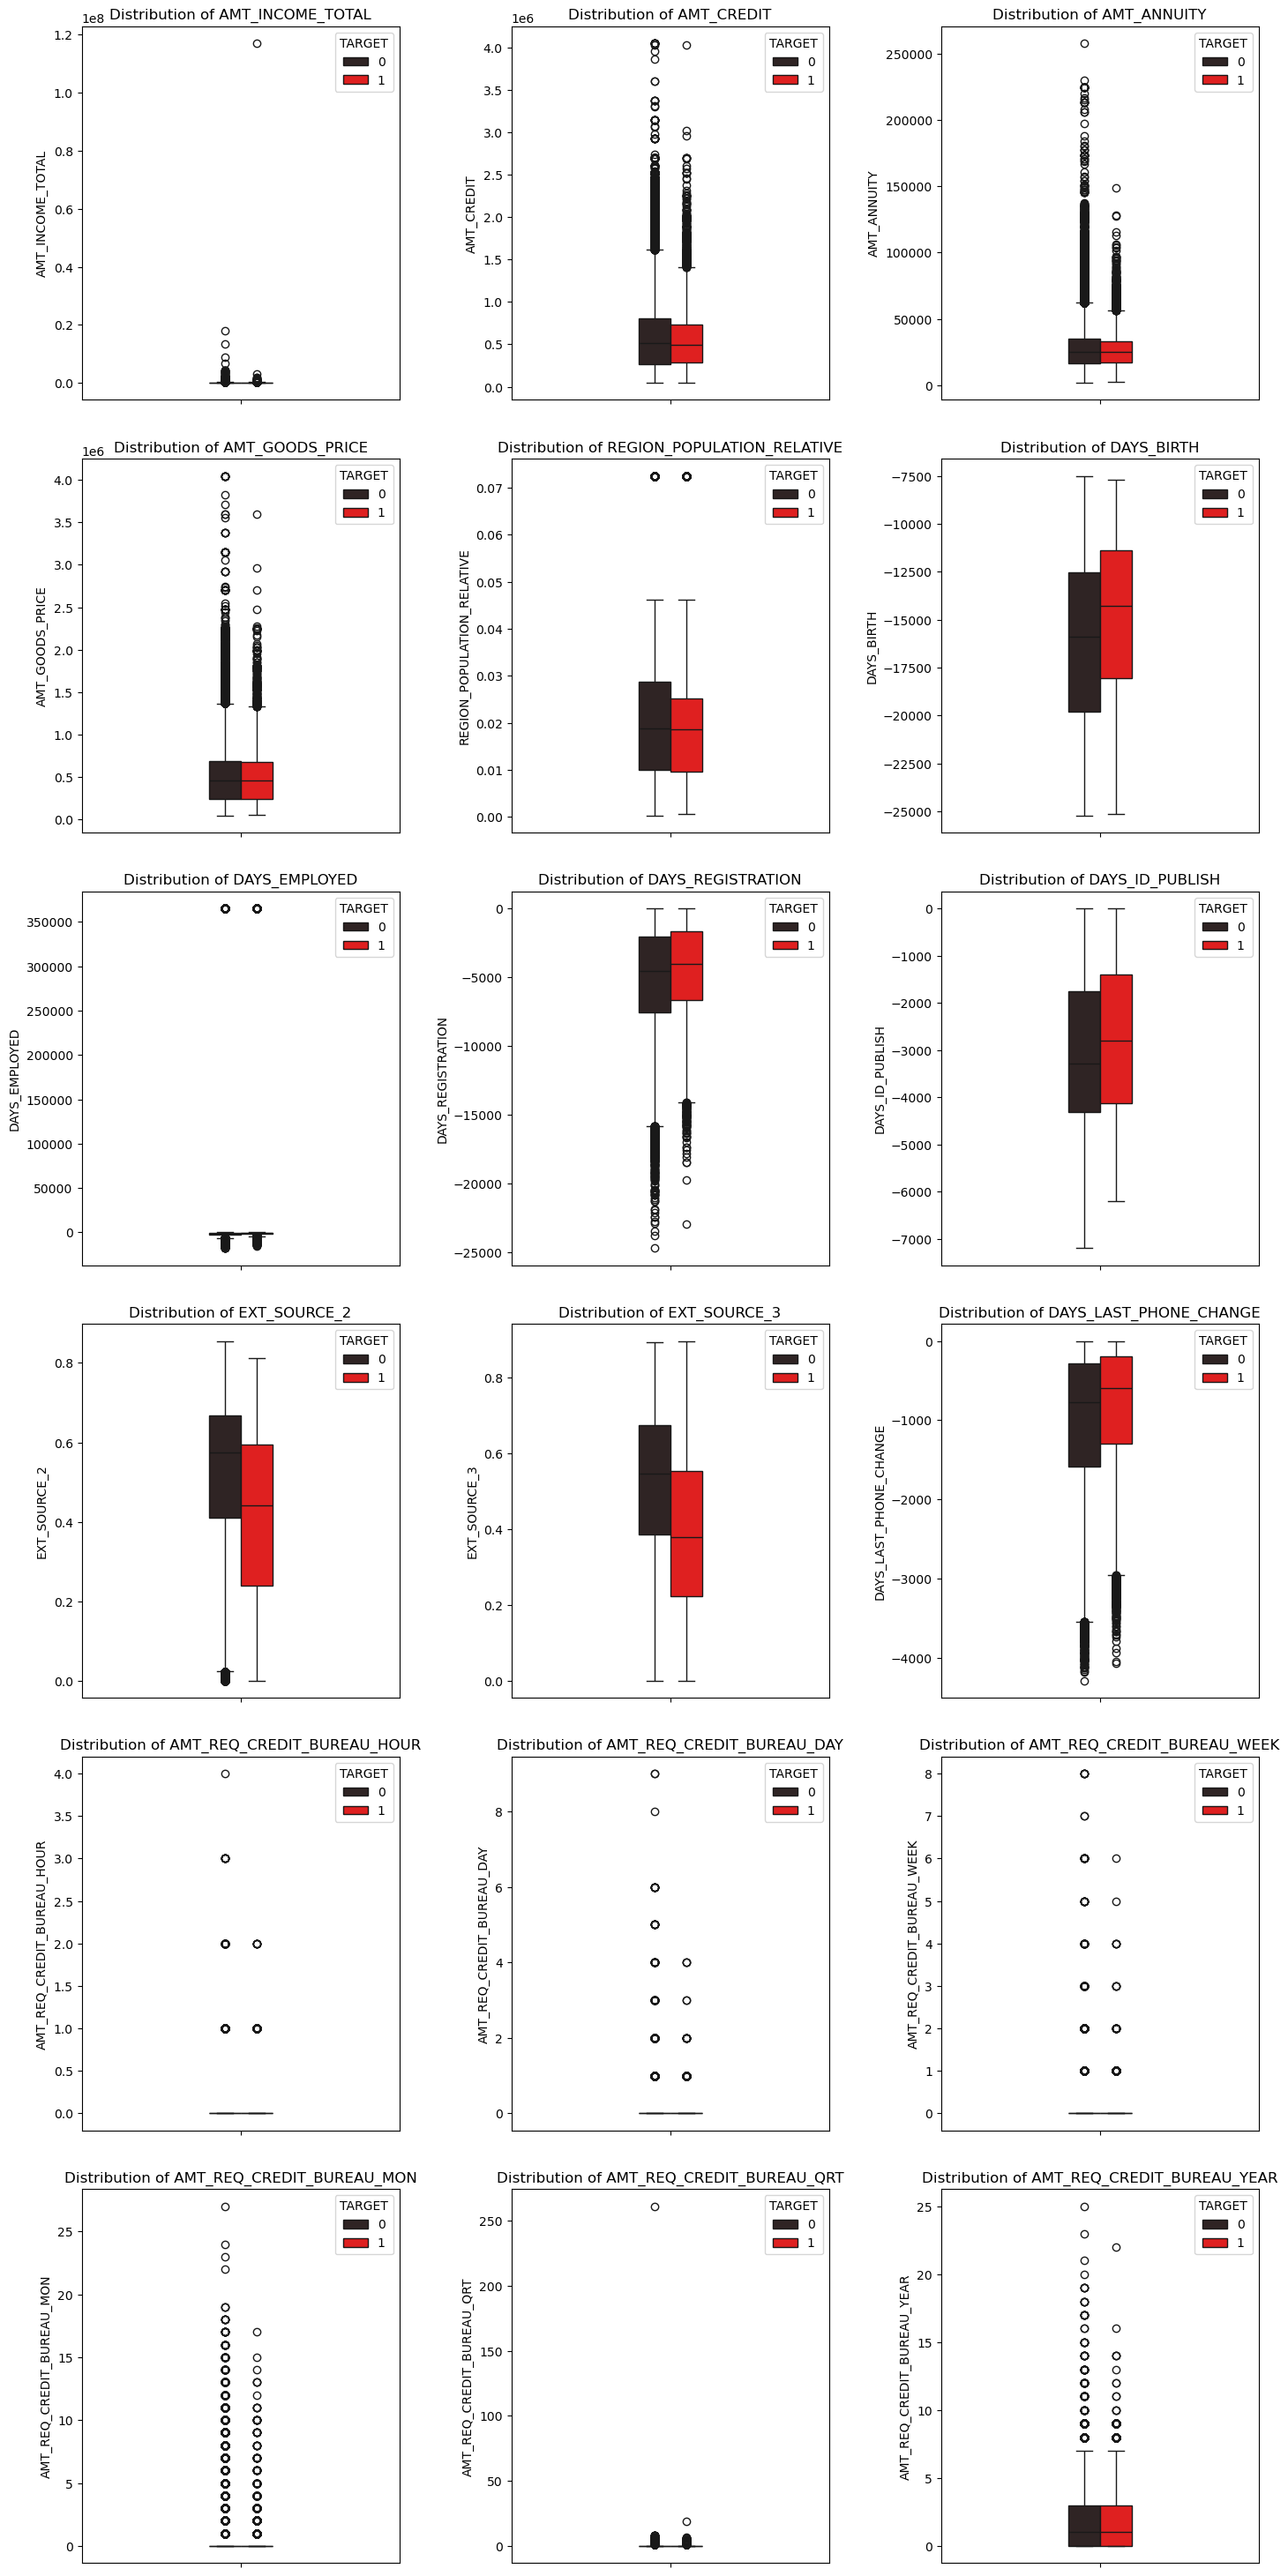

In [8]:
nColumns = numerical_df.columns

cols = 3
rows = int(np.ceil(len(nColumns)/cols))
plt.figure(figsize=(cols*5, rows*5))

for i, col in enumerate(nColumns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[col], palette='dark:red', width=0.2, hue=df['TARGET'])
    
    plt.title(f'Distribution of {col}')
    
plt.tight_layout(pad=3.0)  
plt.show()

Here we present the boxplot visualizations of the numerical variables. There are two boxplots per variable, one for each target class. These visualizations are typically useful for understanding how data distributions vary depending on the target class. However, in our case, there are no significant changes in the distributions.

#### Categorical Distributions

For categorical features we will look for the frequency of appearances.

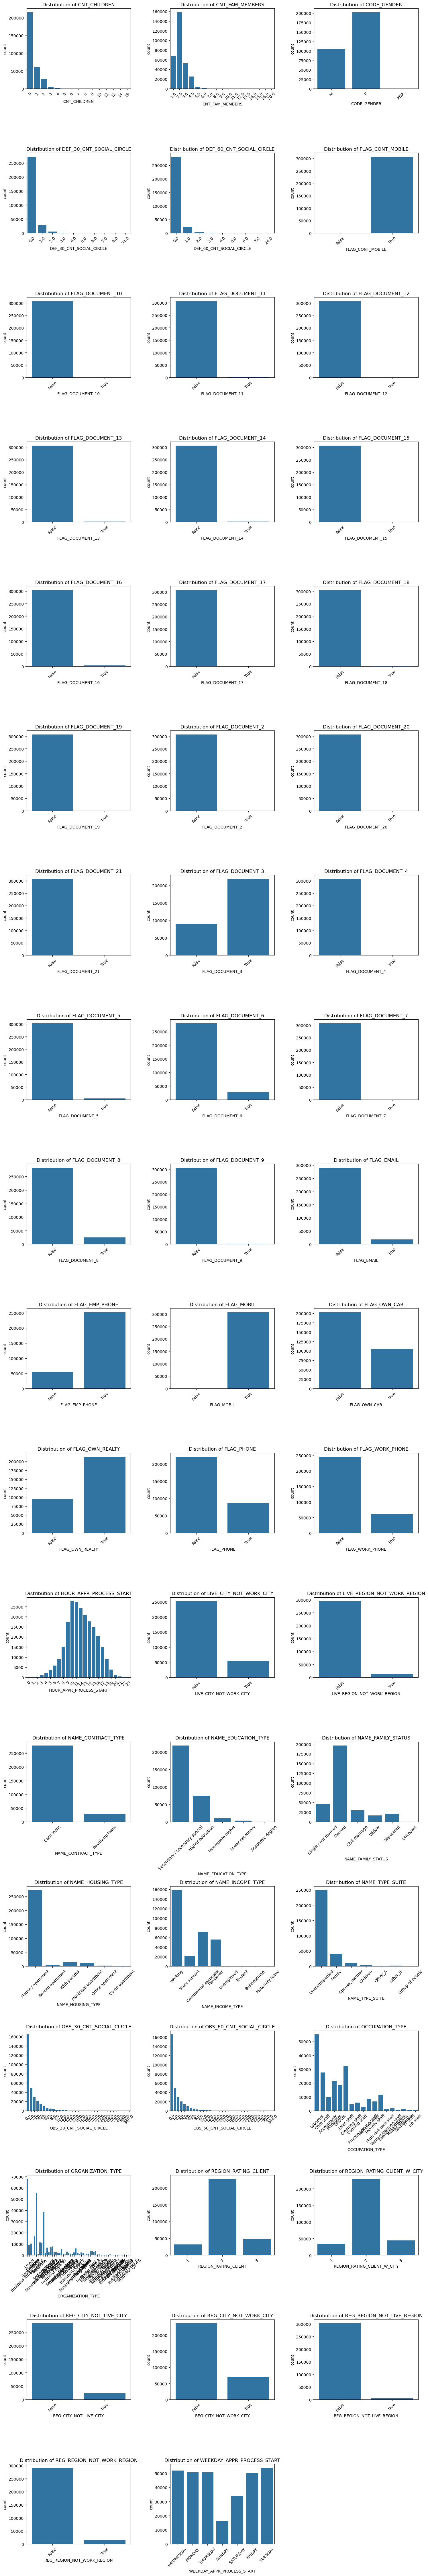

In [9]:
cColumns = categorical_df.columns

cols= 3
rows= int(np.ceil(len(cColumns)/cols))
plt.figure(figsize= (cols*5,rows*5))
for i, feature in enumerate(cColumns):
    plt.subplot(rows, cols, i+1)
    sns.countplot(data= df, x= feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

From these visualizations, we can conclude that the categorical variables are unbalanced, a factor that may be critical for our models and might need to be addressed in the future. This is important to take into account when we train the model.

We can visualize the distribution taking into account the target variable. This will help us to understand the relationship between the categorical variables and the target variable.

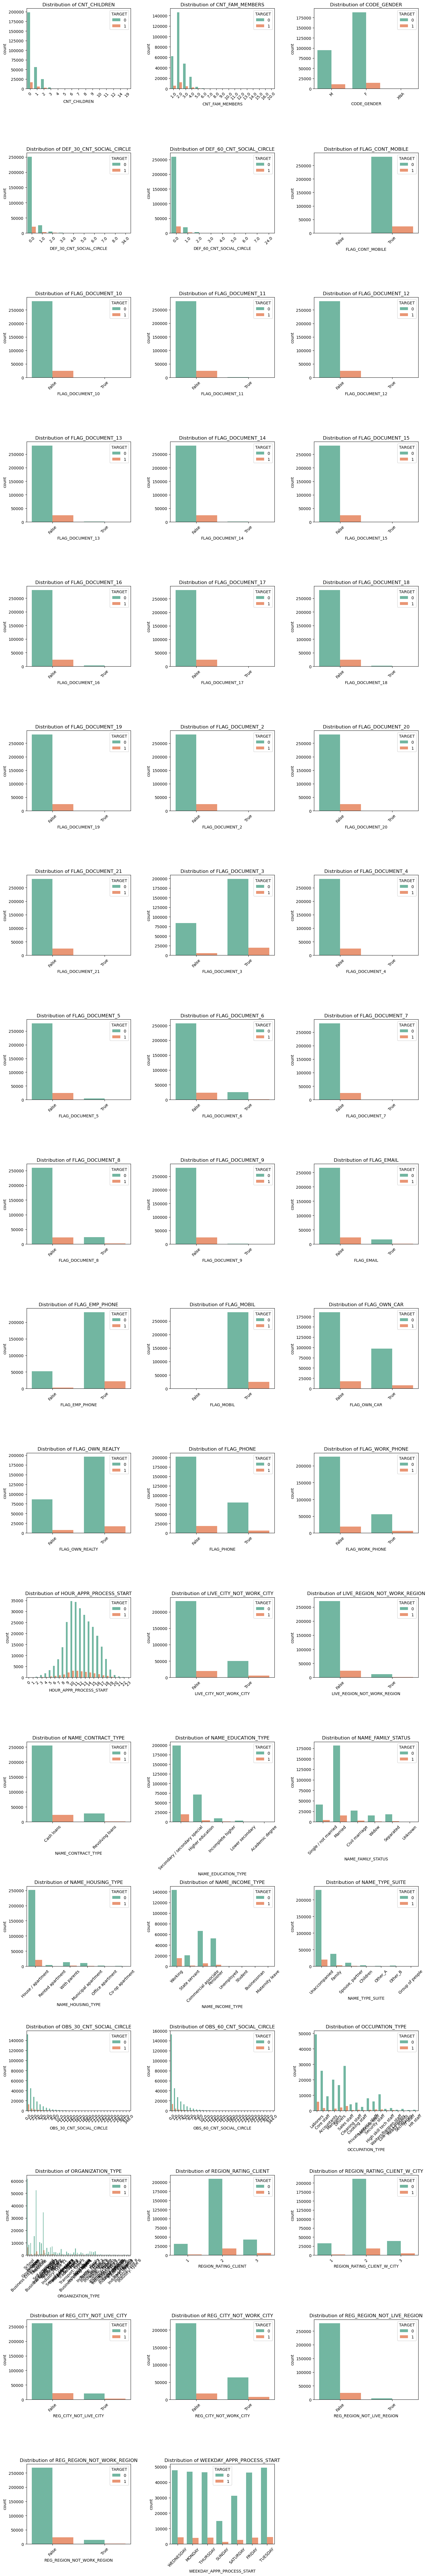

In [10]:
cColumns = categorical_df.columns

#Visulization 
cols= 3
rows= int(np.ceil(len(cColumns)/cols))
plt.figure(figsize= (cols*5,rows*5))
for i, feature in enumerate(cColumns):
    plt.subplot(rows, cols, i+1)
    sns.countplot(data= df, x= feature, palette="Set2", hue= 'TARGET')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

These visualizations display the number of counts in our data based on the value of the target variable. At first glance, no clear patterns can be observed that distinguish the target classes. In the following steps, we will focus on Feature Selection and Feature Engineering, aiming to ensure that the input data fed into our models is as meaningful as possible.